In [2]:
import pandas as pd
import numpy as np

In [3]:
hr=pd.read_csv(r'C:\Users\saketh\Downloads\HR_comma_sep.csv')

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr=hr.rename(columns={'sales':'department'})
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [7]:
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr['Department']=np.where(hr['Department']=='support','technical',hr['Department'])
hr['Department']=np.where(hr['Department']=='IT','technical',hr['Department'])

In [9]:
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


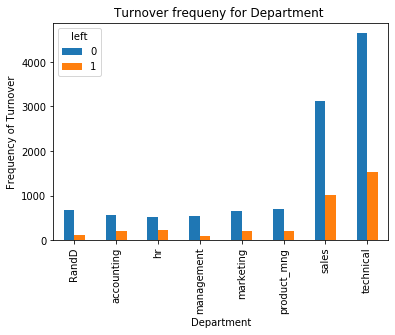

In [12]:
import matplotlib.pyplot as plt
pd.crosstab(hr.Department,hr.left ).plot(kind='bar')
plt.title('Turnover frequeny for Department ')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('Department_bar_chart')

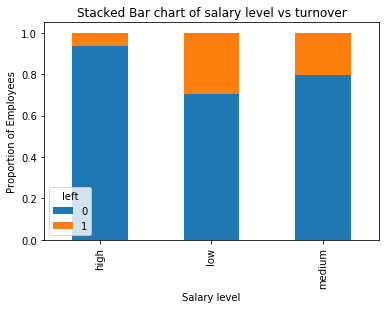

In [14]:
table=pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar chart of salary level vs turnover')
plt.xlabel('Salary level')
plt.ylabel('Proportion of Employees')
plt.savefig('salar_bar_chart')

In [15]:
pd.crosstab(hr.Department,hr.left)

left,0,1
Department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


In [16]:
catcols=set(hr.dtypes[hr.dtypes=='O'].index.values)
catcols

{'Department', 'salary'}

In [17]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
x='*'
for i in catcols:
    print('LABEL ENCODING OF: ',i)
    LE=LabelEncoder()
    print(c(hr[i]))
    hr[i]=LE.fit_transform(hr[i])
    print(c(hr[i]))
    print(x*100)

LABEL ENCODING OF:  salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************
LABEL ENCODING OF:  Department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************


In [18]:
X=hr.drop(['left'],axis=1)
y=hr['left']
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scale=scaler.fit_transform(X_train)
import pickle
filename='scaler.pkl'
pickle.dump(scaler,open(filename,'wb'))


In [21]:
X_scale

array([[0.48351648, 0.25      , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.74725275, 0.265625  , 0.6       , ..., 0.        , 0.14285714,
        1.        ],
       [0.87912088, 0.671875  , 0.2       , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.65934066, 0.90625   , 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.75824176, 0.359375  , 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.51648352, 0.5       , 0.6       , ..., 0.        , 1.        ,
        0.5       ]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_scale,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import accuracy_score
print('Random Forest accurac:{:.3f}'.format(accuracy_score(y_test,rf.predict(X_test))))

Random Forest accurac:0.496


In [24]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=7)
modelCV=RandomForestClassifier()
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,X_scale,y_train,cv=kfold,scoring=scoring)
print('10-fold cross validation averae accuracy for Random Forest Classifier: %.3f' %(results.mean()))

C:\Users\saketh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation averae accuracy for Random Forest Classifier: 0.990


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56      3462
           1       0.28      0.74      0.40      1038

    accuracy                           0.50      4500
   macro avg       0.56      0.58      0.48      4500
weighted avg       0.71      0.50      0.53      4500



In [26]:
filename='PAE_model.pkl'
pickle.dump(rf,open(filename,'wb'))